###                                  <center> CSE505 Algorithms  <center>
###                                               <center> Homework 3 </center>
###                                    <center>   Harlinton Palacios Mosquera </center>
                                   
###                                       <center>  ID: 161041033  </center>                                        
                             

## 1) <center>Breadth-First Search (BFS) and  Depth-First Search (DFS)</center> 

### <center>Load the Data and Prepare Them </center> 

In [1]:
import xlrd
workbook = xlrd.open_workbook("Graph_data.XLS","rb")
sheet = workbook.sheet_by_index(0)
l1 = []
l2 = []
for i in range(sheet.nrows):
    columns = []
    for j in range(sheet.ncols):
        columns.append(sheet.cell(i, j).value)
    l1.append(columns[0])
    l2.append(columns[1])

import numpy
l1 = numpy.asarray(l1, dtype=int)
l2 = numpy.asarray(l2,dtype=int)
uniques = list(numpy.unique(l1))+list(numpy.unique(l2))

harlinton = {}
for i in numpy.unique(uniques):
    a =list(l2[numpy.where(l1 == i)[0]])
    #b =list(l1[numpy.where(l2 == i)[0]])
    c = list(numpy.unique(a))
    harlinton[i] = c
    
harlinton ## This is the Adjacency matrix 

{1: [2, 3, 4, 5, 8],
 2: [4],
 3: [5, 6, 9],
 4: [5],
 5: [6],
 6: [7],
 7: [8, 10],
 8: [9, 10],
 9: [10],
 10: []}

### <center>BFS Implementation </center> 

## Time Complexity of BFS: 
perform containing checks (w in visited) O(1) rather than O(n) for lists. if the implementation is as adjacency matrix, you will traverse O(V^2) which may be O(E) if that is a dense graph.

In [2]:
# visits all the nodes of a graph (connected component) using BFS
def bfs_connected_component(graph, start):
    # keep track of all visited nodes
    explored = []
    # keep track of nodes to be checked
    queue = [start]
    levels = {}         # this dict keeps track of levels
    levels[start]= 1    # depth of start node is 0
    visited= [start]     # to avoid inserting the same node twice into the queue
    # keep looping until there are nodes still to be checked
    while queue:
       # pop shallowest node (first node) from queue
        node = queue.pop(0)
        explored.append(node)
        neighbours = graph[node]

        # add neighbours of node to queue
        for neighbour in neighbours:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)
                levels[neighbour]= levels[node]+1
                #print(neighbour, ">>", levels[neighbour])
    #print(levels)
    return explored
ans = bfs_connected_component(harlinton, 1) 
print(ans)

[1, 2, 3, 4, 5, 8, 6, 9, 10, 7]


### <center>DFS Implementation </center> 

## Time Complexity of DFS: 
Only if the graph is represented as an adjacency list O(1)+O(V)+O(E)=  O(V)+O(E)
The complexity is O(V2). This is because a traversal in the entire row is required to evaluate the neighbours.

In [3]:
def dfs(graph, node, visited):
    if node not in visited:
        visited.append(node)
        for n in graph[node]:
            dfs(graph,n, visited)
    return visited

visited = dfs(harlinton,1, [])
print(visited)


[1, 2, 4, 5, 6, 7, 8, 9, 10, 3]


## 2-) One-Pile NIM

For the implementation of this game we used an algorithm Variable-Size-Decrease, In this variation, the size-reduction pattern varies from one iteration of an algorithm to another.

In this algorithm we can play with computer or with otro player.

Time Complexity: O(log log n)). In worst case it can take upto O(n).

In [4]:
## import random
import random
global opction
howMany=0
gameover=False
chipsNumber= random.randint(10,20)
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    

while True:
    opction=input( color.BOLD + "Who do you want to play with?. With Machine press (0)-- With another player (1)" + color.END)
    try:
        opction = int(opction)
        if opction in  [0,1]:
            if opction == 0:
                player1=str(input("Enter your name Pleyer 1."))
                player2_h= ""
                player2="Computer"
                break
            elif opction ==1 :
                player2=""
                player1=str(input("Enter your name Pleyer 1."))
                player2_h=str(input("Enter your name  Pleyer 2."))           
                  
                                
            
            break        
        print ("False value")        
        
    except ValueError:
        print("Enter a nomber.")
        


if (chipsNumber%4)==1:
    chipsNumber+=1

def removingStrawsComputer():
    removedNumber=random.randint(1,3)
    global chipsNumber
    while removedNumber>chipsNumber:
        removedNumber=random.randint(1,3)
    chipsNumber-=removedNumber
    return chipsNumber

def removingStrawsHuman():
    global chipsNumber
    chipsNumber-=howMany
    return chipsNumber
#________________________________________________________________________________
def humanLegalMove():
    global howMany
    legalMove=False
    while not legalMove:
        print("It's your turn, ",player1)
        howMany=int(input("How many chips do you want to remove?(from 1 to 3) "))
        if  howMany>3 or howMany<1:
            print("Enter a number between 1 and 3.")
        else:
            legalMove=True
    while howMany>chipsNumber:
        print("The entered number is greater than a number of chips remained.")
        howMany=int(input("How many chips do you want to remove?"))
    return howMany

#________________________________________________________________________________
def humanLegalMove1():
    global howMany
    legalMove=False
    while not legalMove:
        print("It's your turn, ",player2_h)
        howMany=int(input("How many chips do you want to remove?(from 1 to 3) "))
        if  howMany>3 or howMany<1:
            print("Enter a number between 1 and 3.")
        else:
            legalMove=True
    while howMany>chipsNumber:
        print("The entered number is greater than a number of chips remained.")
        howMany=int(input("How many chips do you want to remove?"))
    return howMany
#________________________________________________________________________________


def checkWinner(player):
    if chipsNumber==0:
        print(player,'\033[92m'+ " You wins.")
        global gameover
        gameover=True
        return gameover

def resetGameover():
    global gameover
    gameover=False
    return gameover

def game():  
    
    print ( '\033[94m' + "The initial number of straws is: ", + chipsNumber )
    
    if player2_h == "" and player2 == "Computer" :
        while gameover==False:
            print("It's ",player2,"turn. The number of straws left: ",removingStrawsComputer())
            checkWinner(player1)
            if gameover==True:
                break
            humanLegalMove()
            print("The number of straws left: " + '\033[91m',removingStrawsHuman())
            checkWinner(player2)
    else:
        while gameover==False:
            
            humanLegalMove1()
            print("The number of straws left: " + '\033[91m',removingStrawsHuman())
            checkWinner(player2_h)
            
            
            if gameover==True:
                break
                
            humanLegalMove()
            print("The number of straws left: " + '\033[91m',removingStrawsHuman())
            checkWinner(player2)
        
game()

Who do you want to play with?. With Machine press (0)-- With another player (1)1
Enter your name Pleyer 1.Harlinton
Enter your name  Pleyer 2.Baron
The initial number of straws is:  16
It's your turn,  Baron
How many chips do you want to remove?(from 1 to 3) 3
The number of straws left:  13
It's your turn,  Harlinton
How many chips do you want to remove?(from 1 to 3) 2
The number of straws left:  11
It's your turn,  Baron
How many chips do you want to remove?(from 1 to 3) 3
The number of straws left:  8
It's your turn,  Harlinton
How many chips do you want to remove?(from 1 to 3) 1
The number of straws left:  7
It's your turn,  Baron
How many chips do you want to remove?(from 1 to 3) 3
The number of straws left:  4
It's your turn,  Harlinton
How many chips do you want to remove?(from 1 to 3) 2
The number of straws left:  2
It's your turn,  Baron
How many chips do you want to remove?(from 1 to 3) 2
The number of straws left:  0
Baron  You wins.


 ## 3) Divideand- Conquer Algorithm
To finds out tha whether there is an index i for which A[i]=i. To give the solution to this problem, we used <h5>Binary search.</h5>

Tiime Complexity: For the number of comparisons we get the following recursion:
T(n) = T(n/2) + 1; T(1) = 1
By the Master Theorem, since we have
a = 1, b= 2.
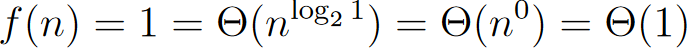

thus

##### T(n) = O(logn)

Implementation below.

In [5]:
# Python program to check fixed point  
# in an array using binary search 
def binarySearch(arrayingers, smallnumber, largenumber):      
    
    #divide the list into two parts
    if largenumber >= smallnumber: 
        mid = int((smallnumber + largenumber)/2)
        midvalue = arrayingers[mid]
    else:
        return -1
        
    #  We compare A [m] with m.
    if (mid == midvalue):
        return mid
    # Continue in the letf half to find the equal index.
    if mid > arr[mid]: 
        return binarySearch(arrayingers, (mid + 1), largenumber) 
    else: 
        return binarySearch(arrayingers, smallnumber, (mid -1)) 
      
    # if there is no A[i]=i 
    return -1
  
arrayingers = [-1, 1, 2, 3, 4, 11, 23, 30, 43] 
n = len(arrayingers) 

findout = int(binarySearch(arrayingers, 0, n-1)) 

if findout == -1:
    print ("There is no equal indix")
    
else:
    print("There is equal index : " + str(binarySearch(arrayingers, 0, n-1))) 

There is equal index : 4


## 4) Divide- Conquer Algorithm for Contiguous Subset with the largest sum

## Tieme complexity: 
Initial call: MaxSubarray( listnum, a, z)

Base case is when the subarray has only 1 element.
So, the time complexity of Divide and Conque solution, we make two recursive call on input size n/2 and finding maximum subarray. 
in the worst case takes O(n).

So, the recurrence relaction is:
### T(n) = 2T(n/2) + Θ(n)



#####  T(n)= n(nlog n)

In [6]:
full = [5, -6, 6, 7, -6, 7, -4, 3]
indices = []

def maxSubArraySum(listnum, a, z):
    if a == z:
        global indices

        # return sum of range and it's left and right index
        return listnum[a], (a,z)
    mid = (a+z)//2
    return max(maxSubArraySum(listnum,a,mid),maxSubArraySum(listnum,mid+1,z),straddleSum(listnum,a,mid,z), key= lambda x: x[0])


def straddleSum(listnum, a, m, z):
    right = -(2**31)-1
    left = -(2**31)-1
    index = 0 
    

    lpos = rpos= None   # left and right index of max range

    count = 0
    for i in range(m,a-1,-1):
        count = count + listnum[i]
        if count > left:
            left = count
            lpos = i

    count = 0
    for i in range(m+1,z+1):
        count = count + listnum[i]
        if count > right:
            right = count
            rpos = i               

    # return sum of range and it's left and right index
    return right + left, (lpos, rpos)

msum, msumb_range = maxSubArraySum(full, 0, len(full)-1)
index=0
p1, p2 =  msumb_range

for element in full[p1:p2+1]:
    print(element, end=',')
print(" The contiguous subset Sum : ", msum)

6,7,-6,7, The contiguous subset Sum :  14


### 5) Algorithm that checks whether a given pattern is valid on a given string

The  Time complexity is O(n^(2m)) where m is the length of the pattern and n is the length of the string

In [56]:
def  wordpattern1(pattern, string):
    p = pattern

    for c in pattern:
        C = c.upper()
        p = p.replace(c,"(?P<{0}>.+)".format(C),1)
        p = p.replace(c,"(?P={0})".format(C),len(pattern))
    p = '^' + p + '$'

    
    if re.search(p,string):
        rem = re.match(p,string)
        seen = {}
        
        for c in pattern:
            s = rem.group(c.upper())
            
            if s in seen and seen[s] != c:
                return 0
            seen[s] = c
        # success
            return  1
    # did not hit the search, fail
    return 0

string = 'tobeornottobe'
pattern= 'abcdab'
check = wordpattern1(pattern,string)
if check == 1:
    print("Pattern is valid")
else:
    print("Pattern is not valid")

Pattern is valid
